# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 2 - Singapore Housing Data and Kaggle Challenge

![housing](images/housing.jpeg)

## Background

The rising housing prices in Singapore have become a prominent and complex issue affecting residents and the overall economy. Over the past few years, there has been a rapid surge in property values, resulting in challenges related to housing affordability and accessibility for many individuals and families. Several factors contribute to this phenomenon. First and foremost, Singapore's limited land supply and growing population put significant pressure on the housing market, leading to an increase in demand for housing units. Additionally, the country's status as a global financial hub and an attractive destination for foreign investors further fuels demand and competition in the real estate sector.

Government policies and initiatives aimed at promoting homeownership and investment in the property market also play a role in the rising prices. While these policies have helped many citizens acquire properties, they have also contributed to the surge in property values. Furthermore, economic growth, low-interest rates, and favorable financing options have encouraged property speculation and investment, further driving up housing prices. As a result, first-time homebuyers and low to middle-income families may face difficulties in purchasing their own homes.

The escalation in housing prices has led to concerns about social equity and income inequality, as well as the potential risk of a property bubble. Policymakers are grappling with the challenge of striking a balance between stimulating economic growth through the property market and ensuring housing affordability for all citizens. Addressing the issue of rising housing prices requires a comprehensive and multi-faceted approach. Policymakers, real estate experts, and stakeholders are continuously exploring various measures to regulate the market, enhance housing supply, and introduce affordability schemes to alleviate the impact on vulnerable segments of the population.

## Problem Statement

The rapid increase in housing prices in Singapore has become a major concern for residents and policymakers. To address this issue, we aim to develop a regression model that can accurately predict housing prices based on various factors such as property features, location, economic indicators, and demographic trends. By understanding the underlying patterns and drivers of housing prices, the regression model will enable us to identify key factors contributing to the soaring prices. This, in turn, will assist in formulating effective policies and strategies to manage housing affordability and create a more sustainable and balanced real estate market in Singapore. The ultimate objective is to provide valuable insights to stakeholders and policymakers, aiding in the development of evidence-based solutions to tackle the challenges posed by escalating housing costs.

Some guideline questions for this project:
- What are the factors that we can consider as input features for the regression model?
- What potential benefits can stakeholders and policymakers gain from the insights provided by the regression model?

# Part 1

## 1) Importing Data and Data Overview

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set graph to sns style
sns.set()

# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [2]:
# Importing Data
# Data Reading
train = pd.read_csv("data/train.csv", low_memory = False)

In [3]:
print(train.shape)
train.head()

(150634, 77)


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,NaN,NaN,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,NaN,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,24,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,NaN,NaN,4.0,1762.082341,NaN,NaN,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,29,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,NaN,1.0,4.0,726.215262,NaN,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,34,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,NaN,1.0,2.0,1540.151439,NaN,NaN,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [4]:
(150634/(150634+16737))*100

90.00005974750704

Train set has 150634 rows and 77 columns, test set has 16737 rows and 76 columns. `resale_price` column will be used to predict using test dataset. Train - Test set is split at (90:10). 

Mean price of resale_price is $449162.



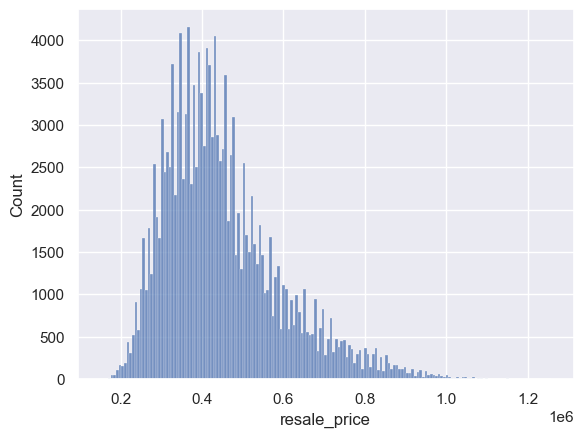

In [5]:
# Overview of the saleprice target
sns.histplot(train['resale_price']);
print(f"Mean price of resale_price is ${round(train['resale_price'].mean())}.\n")

- The distribution of `resale_price` is skewed to the right. In other words, the data is spread out towards higher values, and there are relatively more lower values on the left side of the histogram.

In [6]:
train.describe(include = 'all')

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
count,150634.000000,150634,150634,150634,150634,150634,150634,150634.00000,150634,150634.000000,1.506340e+05,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634,150634,150634.000000,150634.000000,150634.000000,150634.000000,150634,150634,150634,150634,150634,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634,150634.000000,150634.000000,150634,149805.000000,57845.000000,125208.000000,148694.000000,150634.000000,53244.000000,89766.000000,121432.000000,150634.00000,150634.000000,150634.000000,150634,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634,150634.000000,150634.000000,150634.000000,150634,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634,150634.000000,150634.000000,150634.000000,150634.000000
unique,NaN,110,26,7,2514,553,25,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,9157,NaN,NaN,NaN,NaN,1,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9125,NaN,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,1657,NaN,NaN,NaN,177,NaN,NaN,NaN,NaN,NaN,134,NaN,NaN,NaN,NaN
top,NaN,2018-07,JURONG WEST,4 ROOM,2,YISHUN RING RD,04 TO 06,NaN,Model A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 ROOM Model A,"91, TANGLIN HALT RD",NaN,NaN,NaN,NaN,Y,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142091,NaN,NaN,Jurong West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Punggol,NaN,NaN,NaN,NaN,NaN,Blk 121,NaN,NaN,NaN,Marsiling Primary School,NaN,NaN,NaN,NaN,NaN,Bendemeer Secondary School,NaN,NaN,NaN,NaN
freq,NaN,2088,11451,61136,579,2451,34699,NaN,46261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35127,106,NaN,NaN,NaN,NaN,150634,121815,150619,150592,150499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,NaN,NaN,11451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7671,NaN,NaN,NaN,NaN,NaN,774,NaN,NaN,NaN,2075,NaN,NaN,NaN,NaN,NaN,3384,NaN,NaN,NaN,NaN
mean,93047.887496,NaN,NaN,NaN,NaN,NaN,NaN,97.19763,NaN,1992.448464,4.491615e+05,2016.489551,6.580500,8.284823,7.248370,9.321275,8.284823,NaN,NaN,1046.235290,28.551536,15.139816,1990.922906,NaN,NaN,NaN,NaN,NaN,124.683312,0.138813,1.782055,39.219366,50.083978,26.299853,5.940770,0.023972,0.448564,0.063678,0.622516,0.059409,0.000339,NaN,1.366224,103.839391,NaN,664.239826,1.269237,2.149623,5.236486,1173.700148,1.382672,2.358766,4.704122,48.65298,58.138322,765.007872,NaN,0.546364,0.264024,1.365667,103.839400,115.258966,NaN,1.366231,103.839369,395.172974,NaN,55.368190,0.113195,1.366268,103.839106,508.533220,NaN,210.146428,0.031879,1.365986,103.839340
std,53679.906247,NaN,NaN,NaN,NaN,NaN,NaN,24.40304,NaN,12.138829,1.433076e+05,2.752396,3.345468,5.508074,5.515155,5.507364,5.508074,NaN,NaN,262.674321,12.138829,6.232492,12.202185,NaN,NaN,NaN,NaN,NaN,58.349670,5.947970,11.713826,68.748273,45.

Initial summary of descriptive statistics for `train`. We can identify the categorical columns and numerical columns, what the values are and which columns have NaN values.

## 2) Data Cleaning

In [7]:
# Convert all columns naming to lowercase and replace spaces with underscores
train.columns = [x.lower().replace(' ','_') for x in train.columns]

# Renaming columns for better differentiation
train.rename(columns={'affiliation': 'sec_sch_affiliation'}, inplace=True)

### Checking and Handling missing values for train data

In [8]:
# View missing values by count
train.isnull().sum()[train.isnull().sum() > 0]

mall_nearest_distance      829
mall_within_500m         92789
mall_within_1km          25426
mall_within_2km           1940
hawker_within_500m       97390
hawker_within_1km        60868
hawker_within_2km        29202
dtype: int64

Dropping all the columns with NaN except, `'mall_nearest_distance'`, as they have no relavant information that we need.

#### Checking for duplicates.

In [9]:
for column in train.columns:
    duplicates_count = train[column].duplicated().sum()
    if duplicates_count > 0:
        duplicates = train[column][train[column].duplicated(keep=False)]
        duplicates_counts = duplicates.value_counts()
        unique_rows = train[column].nunique()
        if duplicates_count > 0 and unique_rows < 2:
            print(f"Column '{column}':")
            print(duplicates_counts)

Column 'residential':
Y    150634
Name: residential, dtype: int64


The result above shows that the column, `'residential'` only has one kind of value, hence, we'll be dropping it. 

#### Dropping all columns with NaN, duplicates and no relavant info

In [10]:
# Dropping columns with NaN and columns with no relavant info
columns_to_drop = ['id', 'block', 'street_name', 'mid_storey', 'address', 'postal', 'latitude', 'longitude', 
                   'planning_area', 'mrt_latitude', 'mrt_longitude', 'bus_stop_name', 'bus_stop_latitude', 'bus_stop_longitude', 'pri_sch_latitude', 
                   'pri_sch_longitude', 'sec_sch_latitude', 'sec_sch_longitude', 'mall_within_500m', 'mall_within_1km', 'mall_within_2km', 
                   'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km', 'tranc_yearmonth', 'mrt_name', 'pri_sch_name', 'sec_sch_name', 
                   'floor_area_sqft', 'lower', 'mid', 'upper', 'bus_stop_nearest_distance', 'residential', 'other_room_rental', 
                   '3room_rental', '2room_rental', '1room_rental', 'studio_apartment_sold', 'multigen_sold', 'exec_sold', '5room_sold', '4room_sold', 
                   '3room_sold', '2room_sold', '1room_sold']  

train = train.drop(columns=columns_to_drop, axis=1)
train.head(5)

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,full_flat_type,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,mall_nearest_distance,hawker_nearest_distance,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,sec_sch_affiliation
0,KALLANG/WHAMPOA,4 ROOM,10 TO 12,90.0,Model A,2006,680000.0,2016,5,4 ROOM Model A,15,25,2005,N,N,N,N,142,1094.090418,154.753357,84,60,330.083069,0,0,1138.633422,78,1,1138.633422,224,0
1,BISHAN,5 ROOM,07 TO 09,130.0,Improved,1987,665000.0,2012,7,5 ROOM Improved,34,9,1987,N,N,N,N,112,866.941448,640.151925,80,77,903.659703,1,1,415.607357,45,1,447.894399,232,0
2,BUKIT BATOK,EXECUTIVE,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,EXECUTIVE Apartment,24,16,1996,N,N,N,N,90,1459.579948,1762.082341,84,95,1334.251197,1,0,498.849039,39,0,180.074558,188,0
3,BISHAN,4 ROOM,01 TO 05,103.0,Model A,1992,550000.0,2012,4,4 ROOM Model A,29,11,1990,Y,N,N,N,75,950.175199,726.215262,32,86,907.453484,1,1,389.515528,20,1,389.515528,253,1
4,YISHUN,4 ROOM,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,4 ROOM Simplified,34,4,1987,N,N,N,N,48,729.771895,1540.151439,45,0,412.343032,0,0,401.200584,74,0,312.025435,208,0


#### Handling NaN values for 'mall_nearest_distance'
- As there are only 829(0.5% of the rows) rows of NaN over 150634 rows in train set, the NaNs will be filled with the mean of all the values. 

In [11]:
# Convert all NaN values of mall_nearest_distance with mean values of mall_nearest_distance
mean_distance = train['mall_nearest_distance'].mean()
train['mall_nearest_distance'].fillna(mean_distance, inplace=True)
train.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,full_flat_type,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,mall_nearest_distance,hawker_nearest_distance,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,sec_sch_affiliation
0,KALLANG/WHAMPOA,4 ROOM,10 TO 12,90.0,Model A,2006,680000.0,2016,5,4 ROOM Model A,15,25,2005,N,N,N,N,142,1094.090418,154.753357,84,60,330.083069,0,0,1138.633422,78,1,1138.633422,224,0
1,BISHAN,5 ROOM,07 TO 09,130.0,Improved,1987,665000.0,2012,7,5 ROOM Improved,34,9,1987,N,N,N,N,112,866.941448,640.151925,80,77,903.659703,1,1,415.607357,45,1,447.894399,232,0
2,BUKIT BATOK,EXECUTIVE,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,EXECUTIVE Apartment,24,16,1996,N,N,N,N,90,1459.579948,1762.082341,84,95,1334.251197,1,0,498.849039,39,0,180.074558,188,0
3,BISHAN,4 ROOM,01 TO 05,103.0,Model A,1992,550000.0,2012,4,4 ROOM Model A,29,11,1990,Y,N,N,N,75,950.175199,726.215262,32,86,907.453484,1,1,389.515528,20,1,389.515528,253,1
4,YISHUN,4 ROOM,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,4 ROOM Simplified,34,4,1987,N,N,N,N,48,729.771895,1540.151439,45,0,412.343032,0,0,401.200584,74,0,312.025435,208,0


In [12]:
# Double checking for NaN 
train.isnull().sum()

town                        0
flat_type                   0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
tranc_year                  0
tranc_month                 0
full_flat_type              0
hdb_age                     0
max_floor_lvl               0
year_completed              0
commercial                  0
market_hawker               0
multistorey_carpark         0
precinct_pavilion           0
total_dwelling_units        0
mall_nearest_distance       0
hawker_nearest_distance     0
hawker_food_stalls          0
hawker_market_stalls        0
mrt_nearest_distance        0
bus_interchange             0
mrt_interchange             0
pri_sch_nearest_distance    0
vacancy                     0
pri_sch_affiliation         0
sec_sch_nearest_dist        0
cutoff_point                0
sec_sch_affiliation         0
dtype: int64

### Grouping towns into regions to have a wider scope for analysis

In [13]:
train['town'].unique()

array(['KALLANG/WHAMPOA', 'BISHAN', 'BUKIT BATOK', 'YISHUN', 'GEYLANG',
       'HOUGANG', 'BEDOK', 'SENGKANG', 'TAMPINES', 'SERANGOON',
       'BUKIT MERAH', 'BUKIT PANJANG', 'WOODLANDS', 'JURONG WEST',
       'TOA PAYOH', 'CHOA CHU KANG', 'SEMBAWANG', 'ANG MO KIO',
       'PASIR RIS', 'CLEMENTI', 'PUNGGOL', 'JURONG EAST', 'CENTRAL AREA',
       'QUEENSTOWN', 'BUKIT TIMAH', 'MARINE PARADE'], dtype=object)

In [14]:
# Grouping town into regions and creating a new column ['region']
area_to_region = {
    'KALLANG/WHAMPOA': 'Central',
    'BISHAN': 'Central',
    'BUKIT BATOK': 'West',
    'YISHUN': 'North',
    'GEYLANG': 'Central',
    'HOUGANG': 'North-East',
    'BEDOK': 'East',
    'SENGKANG': 'North-East',
    'TAMPINES': 'East',
    'SERANGOON': 'North-East',
    'BUKIT MERAH': 'Central',
    'BUKIT PANJANG': 'West',
    'WOODLANDS': 'North',
    'JURONG WEST': 'West',
    'TOA PAYOH': 'Central',
    'CHOA CHU KANG': 'West',
    'SEMBAWANG': 'North',
    'ANG MO KIO': 'North-East',
    'PASIR RIS': 'East',
    'CLEMENTI': 'West',
    'PUNGGOL': 'North-East',
    'JURONG EAST': 'West',
    'CENTRAL AREA': 'Central',
    'QUEENSTOWN': 'Central',
    'BUKIT TIMAH': 'Central',
    'MARINE PARADE': 'East'
}

train['region'] = train['town'].map(area_to_region)
train.drop(columns='town', axis=1, inplace=True) # drop since no longer needed

## 3) Exploratory Data Analysis

Now that the datasets are cleaned, the next steps would be to perform Exploratory Data Analysis (EDA).
For Exploratory Data Analysis, we will look into the data based on their kind:

A) Categorical Variables

B) Numerical Variables ( Continuous and Discrete Variables)

### Categorical Variables

We will firstly identify the categorical data that can be converted into numerical format. 

- Converting columns of Yes/No into binary 1/0 indicator (1 for Yes, 0 for No).

In [15]:
columns_to_convert = ['commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion']

for column in columns_to_convert:
    train[column] = train[column].map({'Y': 1, 'N': 0})

### Numerical Variables ( Continuous and Discrete Variables)


In [16]:
train_floor_mapping = {
    '01 TO 03': 'low',
    '01 TO 05': 'low',
    '04 TO 06': 'low',
    '06 TO 10': 'low',
    '07 TO 09': 'low',
    '10 TO 12': 'mid',
    '11 TO 15': 'mid',
    '13 TO 15': 'mid',
    '16 TO 18': 'mid',
    '16 TO 20': 'mid',
    '19 TO 21': 'mid',
    '21 TO 25': 'high',
    '22 TO 24': 'high',
    '25 TO 27': 'high',
    '26 TO 30': 'high',
    '28 TO 30': 'high',
    '31 TO 33': 'veryhigh',
    '31 TO 35': 'veryhigh',
    '34 TO 36': 'veryhigh',
    '36 TO 40': 'veryhigh',
    '37 TO 39': 'veryhigh',
    '40 TO 42': 'ultrahigh',
    '43 TO 45': 'ultrahigh',
    '46 TO 48': 'ultrahigh',
    '49 TO 51': 'ultrahigh'
}

train['storey_range'] = [train_floor_mapping[value] for value in train['storey_range']]

## 4) Exploratory Visualizations

### For Categorical Variables

#### Boxplots

Boxplots provide a powerful visual representation that facilitates comprehensive analysis by presenting data in a concise and meaningful manner. They offer an effective way to gain insights and conduct high-level exploration of the data.

By utilizing side-by-side boxplots, we can effectively compare the median and interquartile range (IQR) among different categories. If the distributions across the categories for any variables are very similar, there is no value in adding it in our model as a predictor. 

In [17]:
# Select only categorical field
cat_cols = train.select_dtypes(exclude='number').columns
cat_cols = cat_cols.drop('flat_model') # dropping column with too many categorical values
cat_cols = cat_cols.drop('full_flat_type') # dropping column with too many categorical values

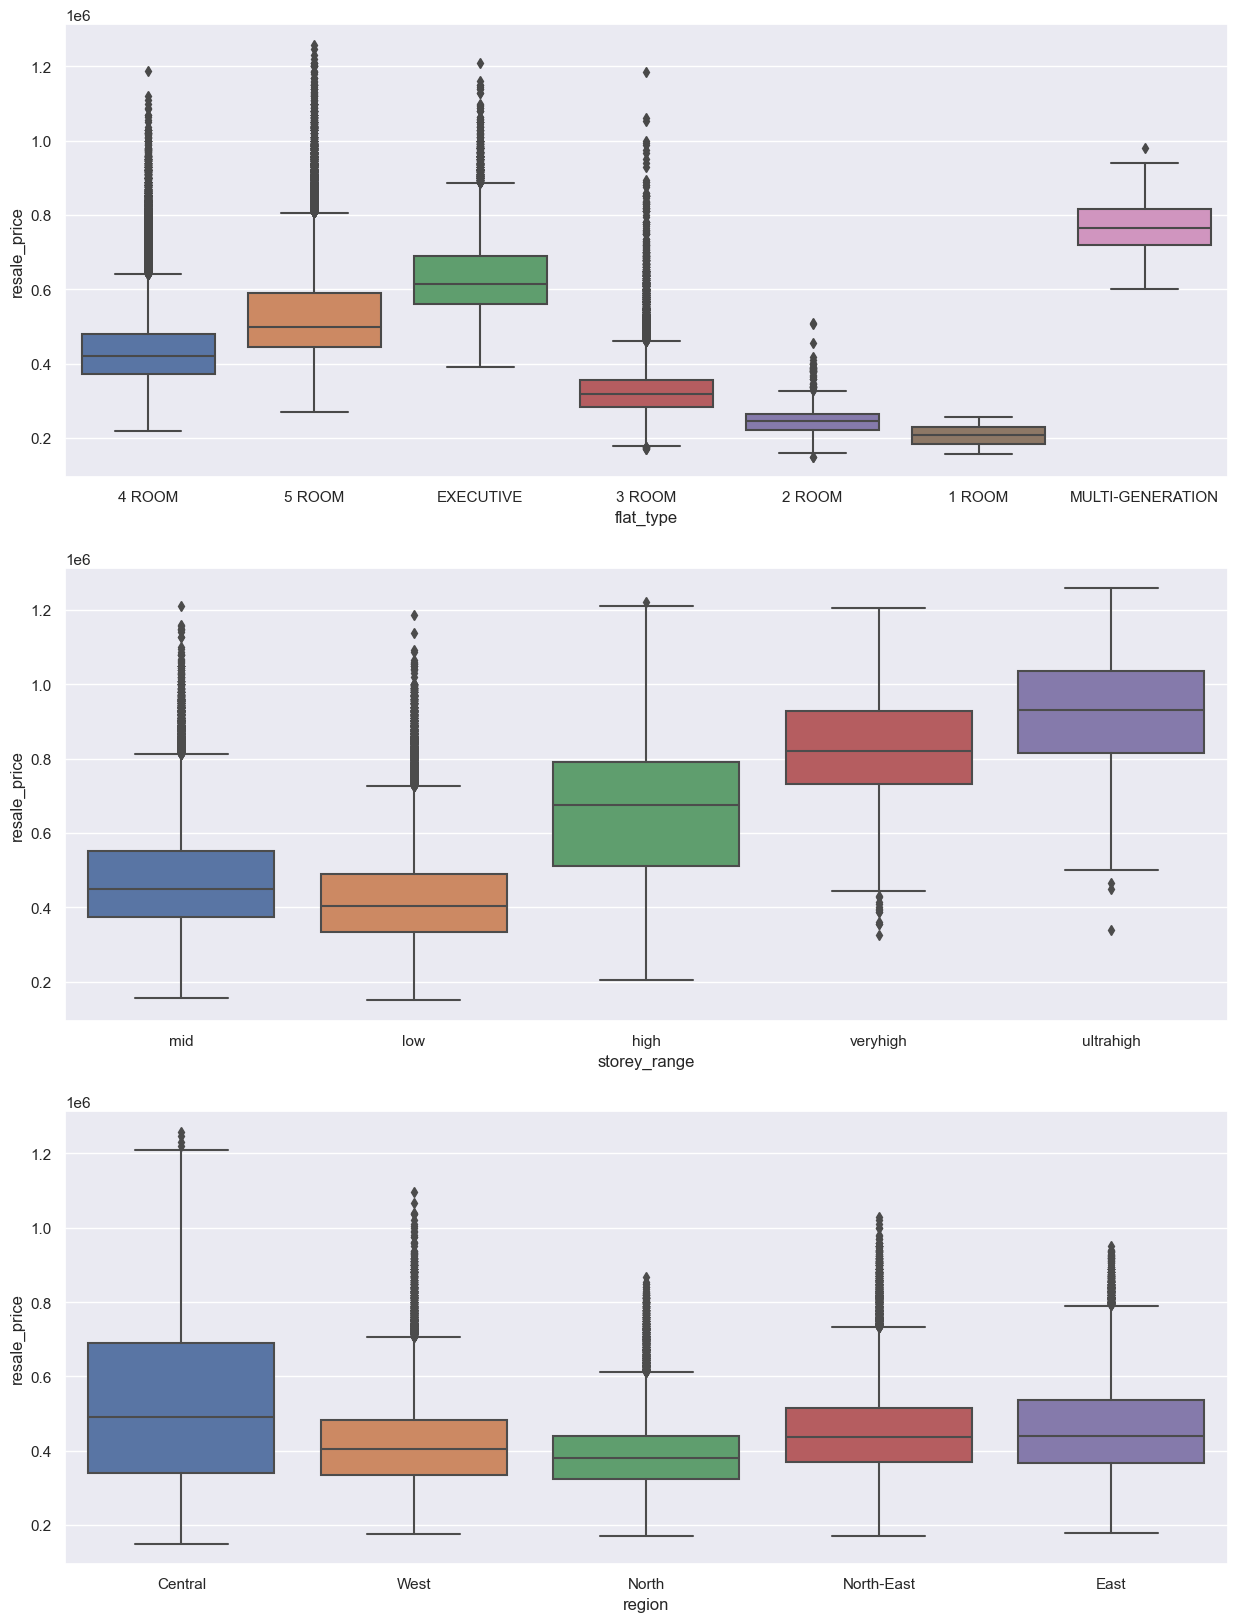

In [18]:
# Plotting Box plot
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 20), sharey=True);
ax = ax.ravel()
for i in range(len(cat_cols)):
    sns.boxplot(x=cat_cols[i], y='resale_price', data=train, ax=ax[i]);


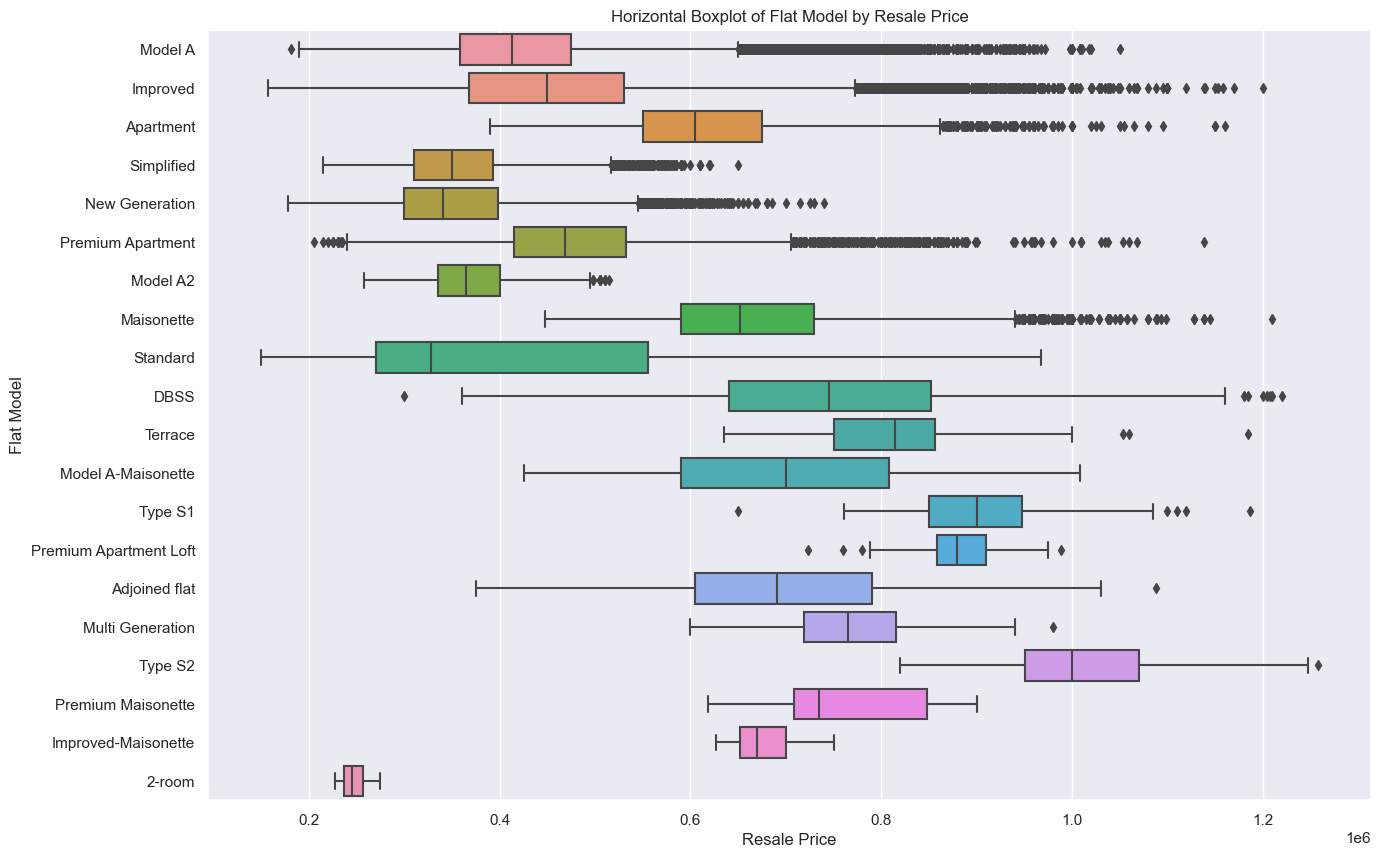

In [19]:
# Create the horizontal boxplot using Seaborn
plt.figure(figsize=(15, 10))  # Optional: Set the size of the plot
sns.boxplot(x='resale_price', y='flat_model', data=train, orient='h')
plt.xlabel('Resale Price')  # Optional: Set the x-axis label
plt.ylabel('Flat Model')  # Optional: Set the y-axis label (assuming 'resale_price' is the y-axis variable)
plt.title('Horizontal Boxplot of Flat Model by Resale Price')  # Optional: Set the title
plt.show()

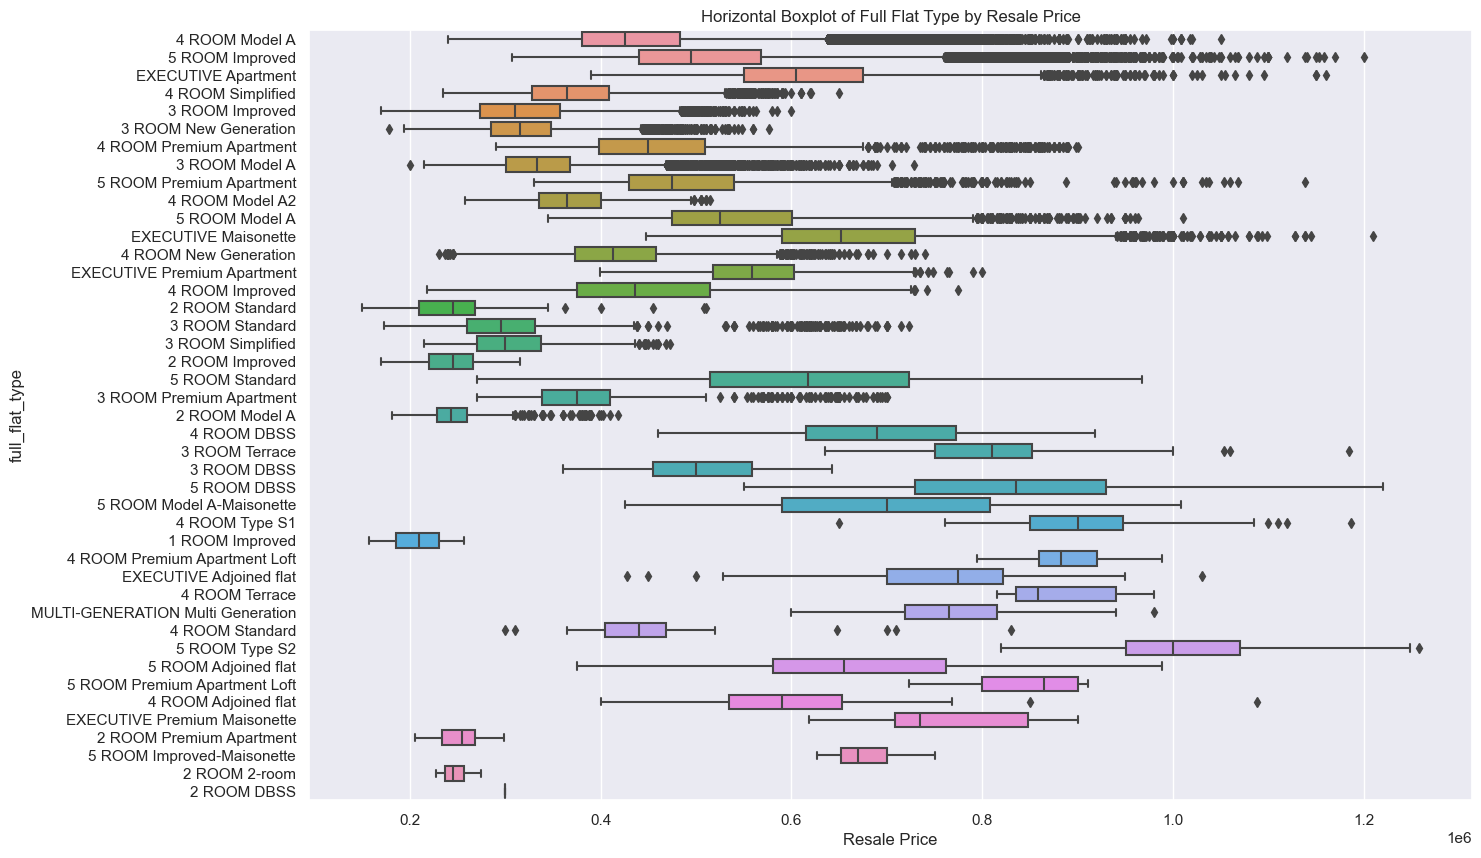

In [20]:
# Create the horizontal boxplot using Seaborn
plt.figure(figsize=(15, 10))  # Optional: Set the size of the plot
sns.boxplot(x='resale_price', y='full_flat_type', data=train, orient='h')
plt.xlabel('Resale Price')  # Optional: Set the x-axis label
plt.ylabel('full_flat_type')  # Optional: Set the y-axis label (assuming 'resale_price' is the y-axis variable)
plt.title('Horizontal Boxplot of Full Flat Type by Resale Price')  # Optional: Set the title
plt.show()

From our boxplots, we can see that all variables have a spread of range and mean, which we can use for our prediction model. 

In [21]:
# Completed list of categorical variables
cat_index = train.select_dtypes(exclude='number').columns
cat_index

Index(['flat_type', 'storey_range', 'flat_model', 'full_flat_type', 'region'], dtype='object')

### For Numerical Variables

#### Correlation Heatmap

Creating a heatmap without annotations allows us to visualize the correlation between numerical variables. This visualization technique aids in the process of selecting appropriate features for our modeling tasks, as it provides a clear representation of the relationships between variables. By removing the annotations, we can focus on identifying patterns and making informed decisions regarding feature selection for our models.

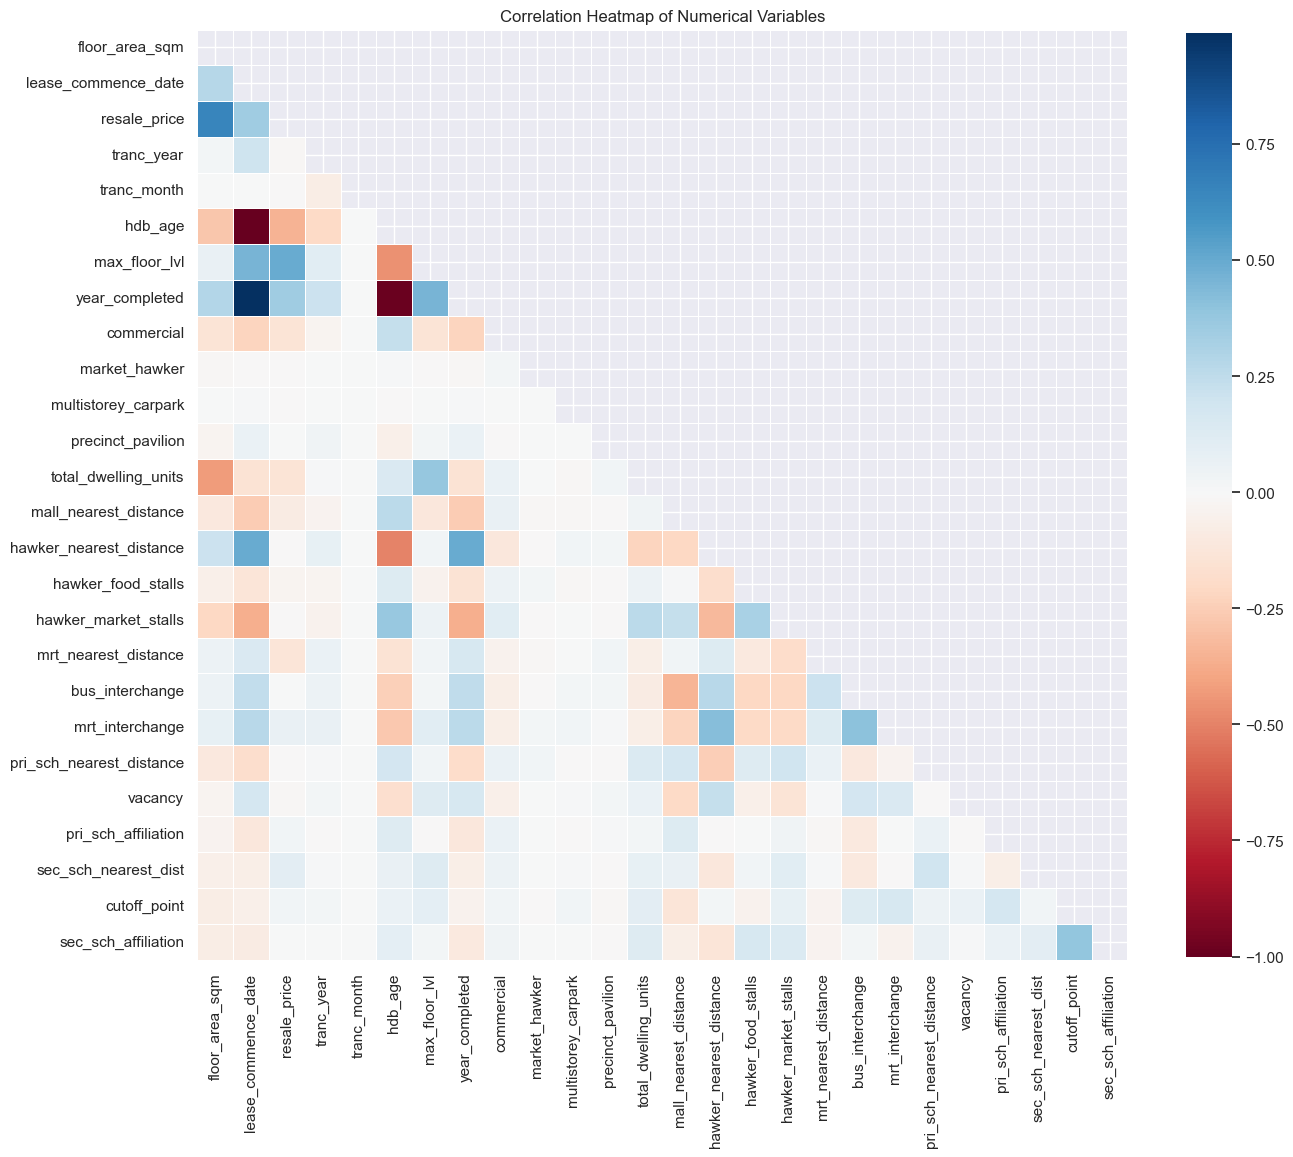

In [22]:
# Correlation Analysis
correlation = round(train.corr(numeric_only=True),2)
plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, square=True, annot=False, mask=mask, cmap='RdBu',linewidths=0.5
            , cbar_kws={'shrink':0.8})
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

#### MultiCollinear Analysis
- It's essential to identify and address multicollinearity in regression models to ensure the validity and reliability of the model's results and to make sound interpretations and decisions based on the analysis.

In [23]:
correlations = train.corr(numeric_only = True)
cut_off = 0.5
high_corrs = correlations[correlations.abs() > cut_off][correlations.abs() != 1].unstack().dropna().to_dict()
high_corrs = pd.Series(high_corrs, index = high_corrs.keys())
high_corrs = high_corrs.reset_index()
high_corrs = pd.DataFrame(high_corrs)
high_corrs.columns = ['Attribute_1', 'Attribute_2','Correlations']
high_corrs['Correlations'] = high_corrs['Correlations'].drop_duplicates(keep ='first')
high_corrs = high_corrs.dropna().sort_values(by = 'Correlations', ascending = False)

In [24]:
# identify multicollinearity
high_corrs

,Attribute_1,Attribute_2,Correlations
2,lease_commence_date,year_completed,0.988912
0,floor_area_sqm,resale_price,0.654120
3,lease_commence_date,hawker_nearest_distance,0.503202
7,hdb_age,hawker_nearest_distance,-0.503202
6,hdb_age,year_completed,-0.988912
1,lease_commence_date,hdb_age,-1.000000


In [25]:
# Drop off collinear variable
correlation = correlation.drop(['lease_commence_date'])

In [26]:
# Selecting features with correlation of >= 0.1
correlation_filtered = correlation['resale_price'][correlation['resale_price'] >= 0.1]
index = correlation_filtered.index
index

Index(['floor_area_sqm', 'resale_price', 'max_floor_lvl', 'year_completed',
       'sec_sch_nearest_dist'],
      dtype='object')

#### Scatter Plots
Scatter plots visually display the relationship between two continuous variables, with each data point represented as a dot on a coordinate system. They help identify patterns, correlations, and outliers in data, providing insights into the nature of the relationship between the variables.

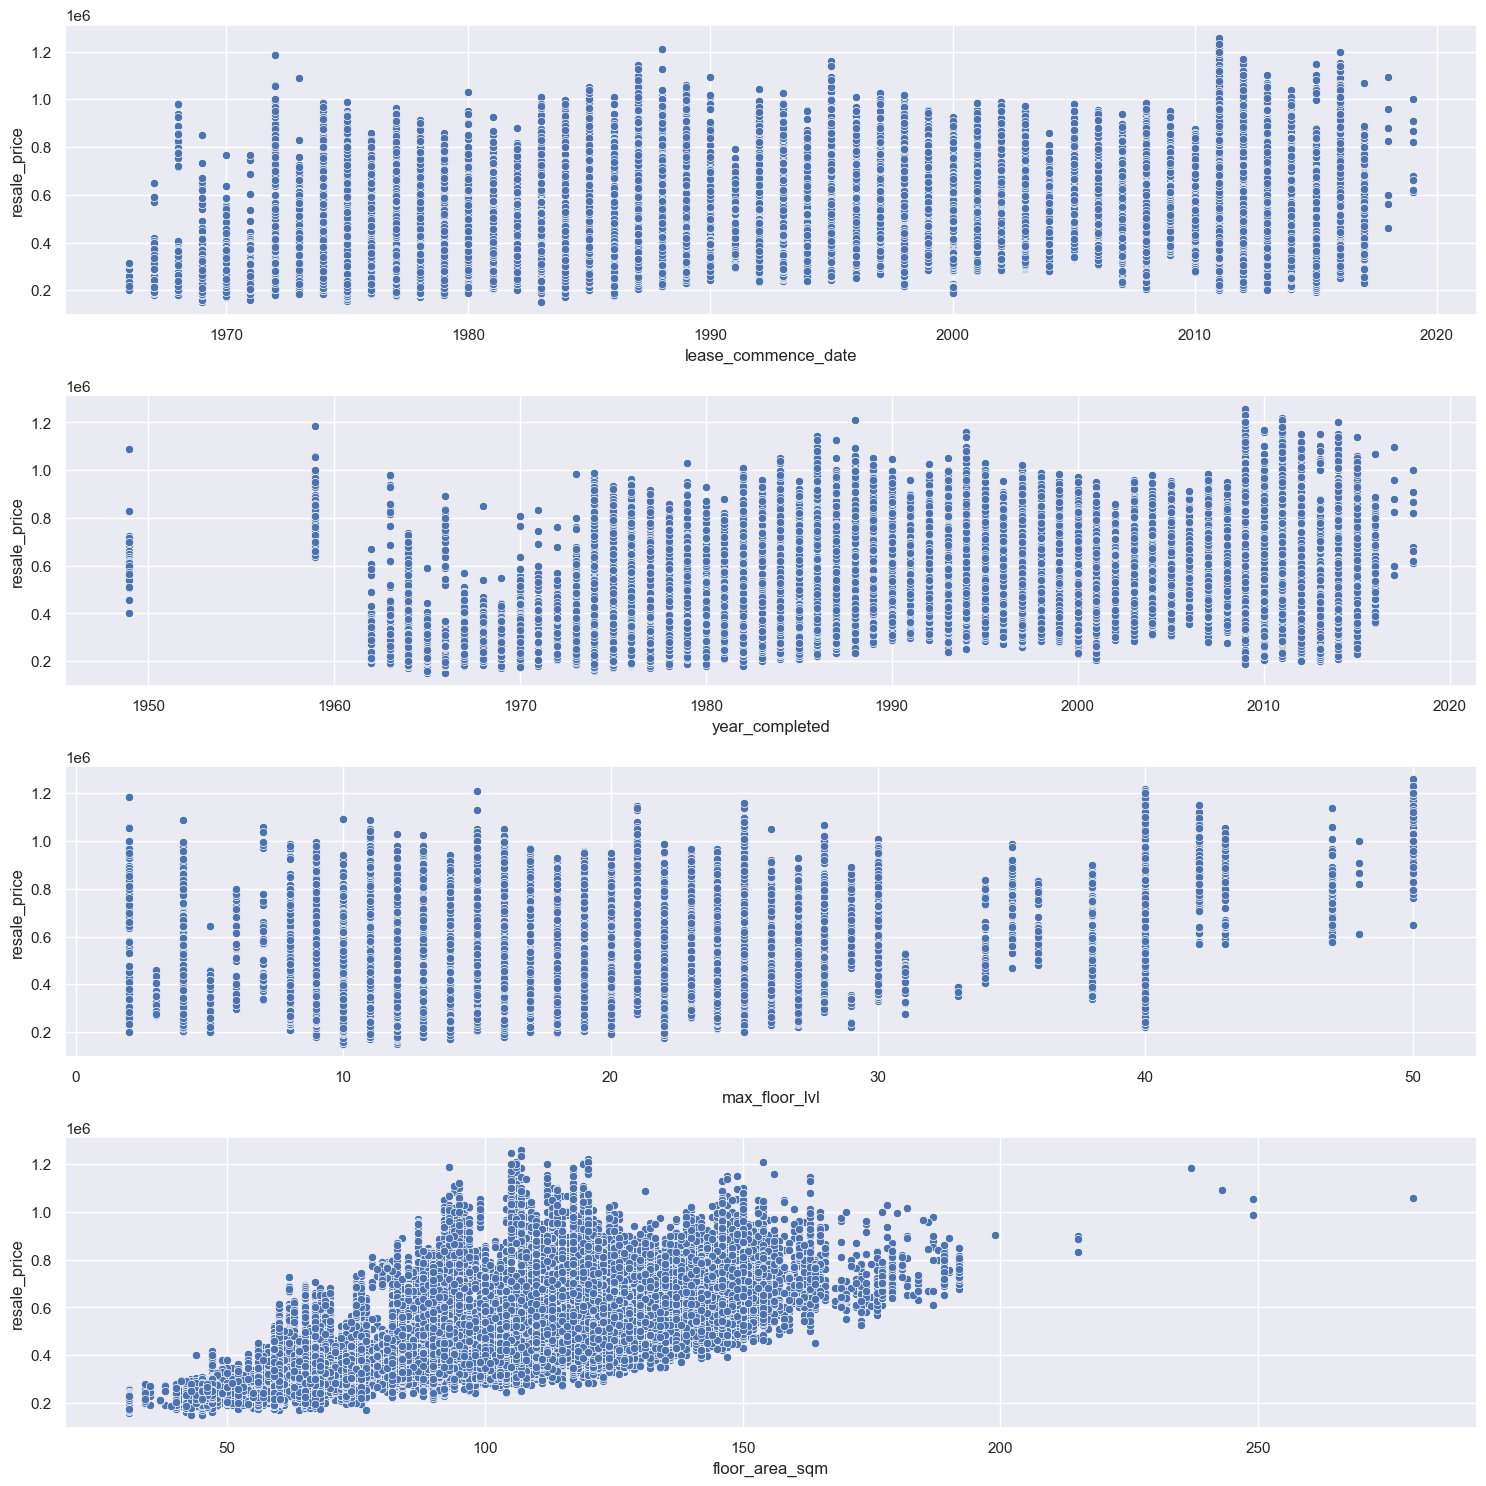

In [27]:
correlation = train.corr(numeric_only = True)
correlation = correlation['resale_price'].sort_values()
index = correlation[correlation>=0.1].index

# Scatter plot
fig, ax = plt.subplots(nrows=4, ncols=1,figsize=(15, 15), sharey=True)
ax = ax.ravel()
for i in range(len(index)-1): 
    sns.scatterplot(x=index[i], y='resale_price', data=train, ax=ax[i])
plt.tight_layout(pad=1)

From the plot above, we can see that the variables have a slightly positive slope with regards to the `resale_price`, with `floor_area_sqm` having the highest correlation. 
The overall trend appears to be quite fitting for our prediction model.

#### Outliers

In [28]:
train[train.floor_area_sqm>200]

,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,full_flat_type,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,mall_nearest_distance,hawker_nearest_distance,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,sec_sch_affiliation,region
371,3 ROOM,low,280.0,Terrace,1972,1060000.0,2015,3,3 ROOM Terrace,49,2,1959,0,0,0,0,8,1072.225651,572.821170,52,112,1036.395130,1,0,752.791589,48,0,678.037848,188,0,Central
1258,EXECUTIVE,low,243.0,Maisonette,1990,1092888.0,2021,3,EXECUTIVE Maisonette,31,10,1988,0,0,0,0,64,450.118063,850.323833,31,51,1405.412952,0,0,329.618668,30,0,956.557404,208,0,Central
5341,3 ROOM,low,249.0,Terrace,1972,988888.0,2012,8,3 ROOM Terrace,49,2,1959,0,0,0,0,6,1175.654106,647.955671,80,12,1183.860213,0,0,725.254089,48,0,520.310251,188,0,Central
17097,3 ROOM,low,215.0,Terrace,1972,830000.0,2017,6,3 ROOM Terrace,49,2,1959,0,0,0,0,8,1105.361404,446.390218,80,12,1104.204245,0,0,594.349481,48,0,559.951624,188,0,Central
41904,EXECUTIVE,mid,215.0,Premium Maisonette,1998,900000.0,2018,1,EXECUTIVE Premium Maisonette,23,13,1996,0,0,0,0,87,214.367412,3387.576774,28,45,179.921243,0,0,262.258539,55,0,386.502739,212,0,West
42650,EXECUTIVE,mid,215.0,Premium Maisonette,1998,888000.0,2017,9,EXECUTIVE Premium Maisonette,23,18,1996,0,0,0,0,128,305.472812,3352.870444,28,45,281.519372,0,0,213.844811,55,0,445.928578,212,0,West
60635,3 ROOM,low,237.0,Terrace,1972,1185000.0,2018,9,3 ROOM Terrace,49,2,1959,0,0,0,0,8,1114.727352,460.930000,80,12,1111.216882,0,0,604.159832,48,0,557.318067,188,0,Central
79886,3 ROOM,low,249.0,Terrace,1972,1053888.0,2017,12,3 ROOM Terrace,49,2,1959,0,0,0,0,6,1175.654106,647.955671,80,12,1183.860213,0,0,725.254089,48,0,520.310251,188,0,Central


There are no outliers that seem to skew with the predictions.

In [29]:
# Completed list of numerical variables
num_index = index
num_index

Index(['lease_commence_date', 'year_completed', 'max_floor_lvl',
       'floor_area_sqm', 'resale_price'],
      dtype='object')

In [30]:
# Dropping off the variables with years and replacing with hdb_age instead. 

# Assuming num_index contains the indices or names of numerical columns, including columns with years
num_index = ['lease_commence_date', 'year_completed', 'max_floor_lvl', 'floor_area_sqm', 'sec_sch_nearest_dist']

# List of columns to remove (columns with years)
columns_to_remove = ['lease_commence_date', 'year_completed']
train.drop(columns_to_remove, axis=1, inplace=True)

# List of columns to add (hdb_age)
columns_to_add = ['hdb_age']

# Replace columns with years with 'hdb_age'
num_index = [col if col not in columns_to_remove else columns_to_add[0] for col in num_index]

# Remove any duplicates in the list
num_index = list(set(num_index))

print(num_index)

['max_floor_lvl', 'floor_area_sqm', 'hdb_age', 'sec_sch_nearest_dist']


In [31]:
cat_index

Index(['flat_type', 'storey_range', 'flat_model', 'full_flat_type', 'region'], dtype='object')

In [32]:
# Final check for any cleaning to be done. 
print(train.shape)
print(train.info())
train.head()

(150634, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   flat_type                 150634 non-null  object 
 1   storey_range              150634 non-null  object 
 2   floor_area_sqm            150634 non-null  float64
 3   flat_model                150634 non-null  object 
 4   resale_price              150634 non-null  float64
 5   tranc_year                150634 non-null  int64  
 6   tranc_month               150634 non-null  int64  
 7   full_flat_type            150634 non-null  object 
 8   hdb_age                   150634 non-null  int64  
 9   max_floor_lvl             150634 non-null  int64  
 10  commercial                150634 non-null  int64  
 11  market_hawker             150634 non-null  int64  
 12  multistorey_carpark       150634 non-null  int64  
 13  precinct_pavilion         15063

,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,tranc_year,tranc_month,full_flat_type,hdb_age,max_floor_lvl,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,mall_nearest_distance,hawker_nearest_distance,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,sec_sch_affiliation,region
0,4 ROOM,mid,90.0,Model A,680000.0,2016,5,4 ROOM Model A,15,25,0,0,0,0,142,1094.090418,154.753357,84,60,330.083069,0,0,1138.633422,78,1,1138.633422,224,0,Central
1,5 ROOM,low,130.0,Improved,665000.0,2012,7,5 ROOM Improved,34,9,0,0,0,0,112,866.941448,640.151925,80,77,903.659703,1,1,415.607357,45,1,447.894399,232,0,Central
2,EXECUTIVE,mid,144.0,Apartment,838000.0,2013,7,EXECUTIVE Apartment,24,16,0,0,0,0,90,1459.579948,1762.082341,84,95,1334.251197,1,0,498.849039,39,0,180.074558,188,0,West
3,4 ROOM,low,103.0,Model A,550000.0,2012,4,4 ROOM Model A,29,11,1,0,0,0,75,950.175199,726.215262,32,86,907.453484,1,1,389.515528,20,1,389.515528,253,1,Central
4,4 ROOM,low,83.0,Simplified,298000.0,2017,12,4 ROOM Simplified,34,4,0,0,0,0,48,729.771895,1540.151439,45,0,412.343032,0,0,401.200584,74,0,312.025435,208,0,North


# Exporting file

In [33]:
# export file
train.to_csv('data/train_cleaned.csv',index=False)